In [2]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Used for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load additional scikit learn packages! if you need
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    # folderPath = os.path.join('/content/drive/My Drive/tumor_dataset/Training',i) # Used for Google Colab
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)

images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

# New Section

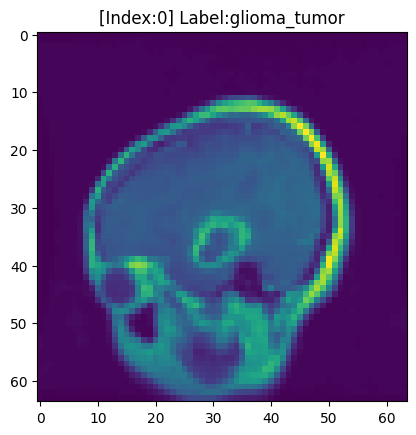

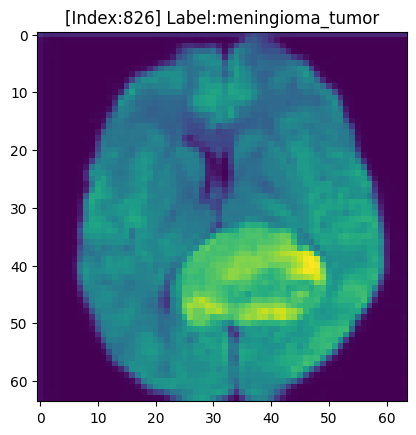

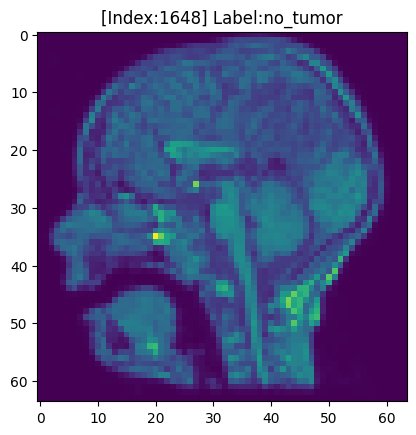

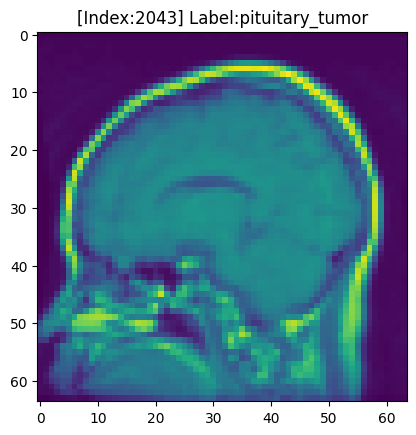

In [6]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

## GridSearch SVM

In [7]:
print("creating gridsearch ")
clf = SVC(kernel='linear')

parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None],
}

grid_search = GridSearchCV(clf, parameters, cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Best estimator:", grid_search.best_estimator_)

creating gridsearch 
Best parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale'}
Best score: 0.813344747583777
Best estimator: SVC(C=0.1, kernel='linear')


In [8]:
svm = SVC(C=0.1, class_weight='None', gamma='scale', random_state=2)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print('Accuracy: ', sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8257839721254355


## GridSearch Random Forest

In [8]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_forest = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=3
)

grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best accuracy score:', grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.851 total time=   3.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.853 total time=   2.8s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.841 total time=   3.7s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.871 total time=   3.5s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.883 total time=   2.9s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.851 total time=   5.8s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.858 total time=   7.3s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.851 total time=   5.9

In [9]:
random_forest = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=2)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.91
